In [32]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
import warnings
import sklearn
import numpy as np
warnings.filterwarnings("ignore")

In [4]:
features = pd.read_csv('/Users/dariyamamayeva/Desktop/pocketDJ/fma_metadata/features.csv', index_col=0,header=[0, 1, 2], skip_blank_lines=True)
tracks = pd.read_csv('/Users/dariyamamayeva/Desktop/pocketDJ/fma_metadata/tracks.csv', index_col=0, header=[0, 1])

#genres = pd.read_csv('/Users/dariyamamayeva/Desktop/pocketDJ/fma_metadata/genres.csv')
#spotify_data = pd.read_csv('/Users/dariyamamayeva/Desktop/pocketDJ/fma_metadata/echonest.csv', index_col=0, header=[0, 1])

In [5]:
features.head()

feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
track_id                                                                   
2             7.180653  5.230309  0.249321  1.347620  1.482478  0.531371   
3             1.888963  0.760539  0.345297  2.295201  1.654031  0.067592   
5             0.527563 -0.077654 -0.279610  0.685883  1.937570  0.880839   
10            3.702245 -0.291193  2.196742 -0.234449  1.367364  0.998411   
20           -0.193837 -0.198527  0.201546  0.258556  0.775204  0.084794   

feature                                             ...   tonnetz            \
statistics                                          ...       std             
number            07        08        09        10  ...        04        05   
track_id                                            ...                       
2           1.481593  2.691455  0.866868  1.341231  ...  0.054125  0.012226   
3           1.366848  1.054094  0.108103  0.619185  ...  0.063831  0.014212   
5          -0.923192 -0.927232  0.666617  1.038546  ...  0.040730  0.012691   
10          1.770694  1.604566  0.521217  1.982386  ...  0.074358  0.017952   
20         -0.289294 -0.816410  0.043851 -0.804761  ...  0.095003  0.022492   

feature                     zcr                                          \
statistics             kurtosis       max      mean    median       min   
number            06         01        01        01        01        01   
track_id                                                                  
2           0.012111   5.758890  0.459473  0.085629  0.071289  0.000000   
3           0.017740   2.824694  0.466309  0.084578  0.063965  0.000000   
5           0.014759   6.808415  0.375000  0.053114  0.041504  0.000000   
10          0.013921  21.434212  0.452148  0.077515  0.071777  0.000000   
20          0.021355  16.669037  0.469727  0.047225  0.040039  0.000977   

feature                         
statistics      skew       std  
number            01        01  
track_id                        
2           2.089872  0.061448  
3           1.716724  0.069330  
5           2.193303  0.044861  
10          3.542325  0.040800  
20          3.189831  0.030993  

[5 rows x 518 columns]

In [6]:
tracks.head()

album                                                     \
         comments         date_created        date_released engineer   
track_id                                                               
2               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
3               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
5               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
10              0  2008-11-26 01:45:08  2008-02-06 00:00:00      NaN   
20              0  2008-11-26 01:45:05  2009-01-06 00:00:00      NaN   

                                                                          \
         favorites id                                information listens   
track_id                                                                   
2                4  1                                    <p></p>    6073   
3                4  1                                    <p></p>    6073   
5                4  1                                    <p></p>    6073   
10               4  6                                        NaN   47632   
20               2  4  <p> "spiritual songs" from Nicky Cook</p>    2710   

                        ...       track                         \
         producer tags  ... information interest language_code   
track_id                ...                                      
2             NaN   []  ...         NaN     4656            en   
3             NaN   []  ...         NaN     1470            en   
5             NaN   []  ...         NaN     1933            en   
10            NaN   []  ...         NaN    54881            en   
20            NaN   []  ...         NaN      978            en   

                                                                              \
                                                    license listens lyricist   
track_id                                                                       
2         Attribution-NonCommercial-ShareAlike 3.0 Inter...    1293      NaN   
3         Attribution-NonCommercial-ShareAlike 3.0 Inter...     514      NaN   
5         Attribution-NonCommercial-ShareAlike 3.0 Inter...    1151      NaN   
10        Attribution-NonCommercial-NoDerivatives (aka M...   50135      NaN   
20        Attribution-NonCommercial-NoDerivatives (aka M...     361      NaN   

                                                 
         number publisher tags            title  
track_id                                         
2             3       NaN   []             Food  
3             4       NaN   []     Electric Ave  
5             6       NaN   []       This World  
10            1       NaN   []          Freeway  
20            3       NaN   []  Spiritual Level  

[5 rows x 52 columns]

In [7]:
keep_cols = [('set', 'split'),
('set', 'subset'),('track', 'genre_top'), ('track', 'genres')]

tracks = tracks[keep_cols]
tracks.head()

set             track           
             split  subset genre_top     genres
track_id                                       
2         training   small   Hip-Hop       [21]
3         training  medium   Hip-Hop       [21]
5         training   small   Hip-Hop       [21]
10        training   small       Pop       [10]
20        training   large       NaN  [76, 103]

In sound processing, the mel-frequency cepstrum (MFC) is a representation of the short-term power spectrum of a sound, based on a linear cosine transform of a log power spectrum on a nonlinear mel scale of frequency.

In [14]:
small = tracks['set', 'subset'] == 'small'
train = tracks['set', 'split'] == 'training'
val = tracks['set', 'split'] == 'validation'
test = tracks['set', 'split'] == 'test'

y_train = tracks.loc[small & train, ('track', 'genre_top')]
y_val = tracks.loc[small & val, ('track', 'genre_top')]
y_test = tracks.loc[small & test, ('track', 'genre_top')]

X_train = features.loc[small & train]
X_val = features.loc[small & val]
X_test = features.loc[small & test]

In [9]:
X_train = features.loc[small & train, :]
min = X_train.min()
max = X_train.max()
X_train = X_train - min
X_train = X_train/(max-min)

## TSNE

In [49]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X_train.values)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 6400 samples in 0.004s...
[t-SNE] Computed neighbors for 6400 samples in 0.581s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6400
[t-SNE] Computed conditional probabilities for sample 2000 / 6400
[t-SNE] Computed conditional probabilities for sample 3000 / 6400
[t-SNE] Computed conditional probabilities for sample 4000 / 6400
[t-SNE] Computed conditional probabilities for sample 5000 / 6400
[t-SNE] Computed conditional probabilities for sample 6000 / 6400
[t-SNE] Computed conditional probabilities for sample 6400 / 6400
[t-SNE] Mean sigma: 48.405259
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.756546
[t-SNE] KL divergence after 300 iterations: 2.345903


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

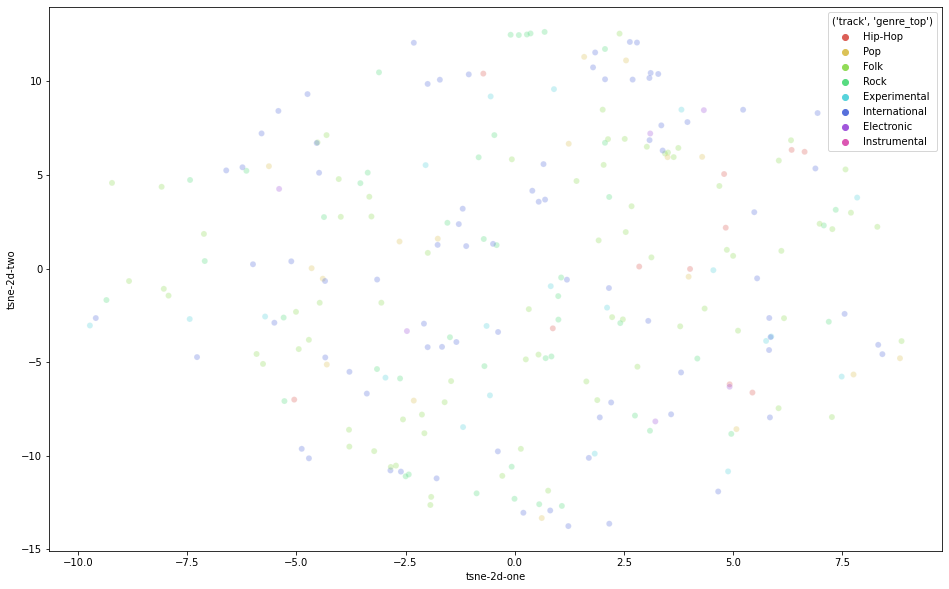

In [71]:
df_subset = pd.DataFrame(X_train.values)
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue=y_train,
    palette=sns.color_palette("hls", 8),
    data=df_subset,
    legend="full",
    alpha=0.3
)

# PCA двухкомпонентный 

In [28]:
pca = PCA(n_components=2)
X = pca.fit(X_train)
X = pca.transform(X_train)
#plt.scatter(X[:,0], X[:,1],cmap='RdBu', c = y_train['genre_top'])
#plt.show()

## Анализ PCA для поиска наиболее значимых фич

In [22]:
pca.explained_variance_ratio_

array([0.56060092, 0.30279877])

In [23]:
df = pd.DataFrame(pca.components_)
df_a = df.abs()
dt = df_a.iloc[0].sort_values(ascending=False)
[list(dt[dt>0.1].index)] #самые значимые фичи 

[[465, 464, 409, 408, 402, 401, 407, 468, 463]]

In [31]:
#корреляция между этими фичами
cor_matrix = X_train.iloc[:,list(dt[dt>0.1].index)].corr().abs()
#print(cor_matrix)
X_train.iloc[:,list(dt[dt>0.1].index)].corr().abs()

feature                              spectral_rolloff            \
statistics                                     median      mean   
number                                             01        01   
feature            statistics number                              
spectral_rolloff   median     01             1.000000  0.970854   
                   mean       01             0.970854  1.000000   
spectral_centroid  median     01             0.973153  0.960944   
                   mean       01             0.951803  0.983378   
spectral_bandwidth median     01             0.909672  0.933138   
                   mean       01             0.881284  0.934421   
spectral_centroid  max        01             0.125729  0.166722   
spectral_rolloff   std        01             0.312555  0.445322   
                   max        01             0.063227  0.094716   

feature                              spectral_centroid            \
statistics                                      median      mean   
number                                              01        01   
feature            statistics number                               
spectral_rolloff   median     01              0.973153  0.951803   
                   mean       01              0.960944  0.983378   
spectral_centroid  median     01              1.000000  0.974095   
                   mean       01              0.974095  1.000000   
spectral_bandwidth median     01              0.887973  0.902095   
                   mean       01              0.866203  0.904820   
spectral_centroid  max        01              0.124105  0.180516   
spectral_rolloff   std        01              0.273546  0.426057   
                   max        01              0.068660  0.102373   

feature                              spectral_bandwidth            \
statistics                                       median      mean   
number                                               01        01   
feature            statistics number                                
spectral_rolloff   median     01               0.909672  0.881284   
                   mean       01               0.933138  0.934421   
spectral_centroid  median     01               0.887973  0.866203   
                   mean       01               0.902095  0.904820   
spectral_bandwidth median     01               1.000000  0.984692   
                   mean       01               0.984692  1.000000   
spectral_centroid  max        01               0.170549  0.190956   
spectral_rolloff   std        01               0.492411  0.545580   
                   max        01               0.101445  0.119585   

feature                              spectral_centroid spectral_rolloff  \
statistics                                         max              std   
number                                              01               01   
feature            statistics number                                      
spectral_rolloff   median     01              0.125729         0.312555   
                   mean       01              0.166722         0.445322   
spectral_centroid  median     01              0.124105         0.273546   
                   mean       01              0.180516         0.426057   
spectral_bandwidth median     01              0.170549         0.492411   
                   mean       01              0.190956         0.545580   
spectral_centroid  max        01              1.000000         0.360861   
spectral_rolloff   std        01              0.360861         1.000000   
                   max        01              0.797542         0.257405   

feature                                         
statistics                                 max  
number                                      01  
feature            statistics number            
spectral_rolloff   median     01      0.063227  
                   mean       01      0.094716  
spectral_centroid  median     01      0.068660  
                   mean   

In [33]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool)) #попытка дропнуть фичи с высокой корреляцией
upper_tri

feature                              spectral_rolloff            \
statistics                                     median      mean   
number                                             01        01   
feature            statistics number                              
spectral_rolloff   median     01                  NaN  0.970854   
                   mean       01                  NaN       NaN   
spectral_centroid  median     01                  NaN       NaN   
                   mean       01                  NaN       NaN   
spectral_bandwidth median     01                  NaN       NaN   
                   mean       01                  NaN       NaN   
spectral_centroid  max        01                  NaN       NaN   
spectral_rolloff   std        01                  NaN       NaN   
                   max        01                  NaN       NaN   

feature                              spectral_centroid            \
statistics                                      median      mean   
number                                              01        01   
feature            statistics number                               
spectral_rolloff   median     01              0.973153  0.951803   
                   mean       01              0.960944  0.983378   
spectral_centroid  median     01                   NaN  0.974095   
                   mean       01                   NaN       NaN   
spectral_bandwidth median     01                   NaN       NaN   
                   mean       01                   NaN       NaN   
spectral_centroid  max        01                   NaN       NaN   
spectral_rolloff   std        01                   NaN       NaN   
                   max        01                   NaN       NaN   

feature                              spectral_bandwidth            \
statistics                                       median      mean   
number                                               01        01   
feature            statistics number                                
spectral_rolloff   median     01               0.909672  0.881284   
                   mean       01               0.933138  0.934421   
spectral_centroid  median     01               0.887973  0.866203   
                   mean       01               0.902095  0.904820   
spectral_bandwidth median     01                    NaN  0.984692   
                   mean       01                    NaN       NaN   
spectral_centroid  max        01                    NaN       NaN   
spectral_rolloff   std        01                    NaN       NaN   
                   max        01                    NaN       NaN   

feature                              spectral_centroid spectral_rolloff  \
statistics                                         max              std   
number                                              01               01   
feature            statistics number                                      
spectral_rolloff   median     01              0.125729         0.312555   
                   mean       01              0.166722         0.445322   
spectral_centroid  median     01              0.124105         0.273546   
                   mean       01              0.180516         0.426057   
spectral_bandwidth median     01              0.170549         0.492411   
                   mean       01              0.190956         0.545580   
spectral_centroid  max        01                   NaN         0.360861   
spectral_rolloff   std        01                   NaN              NaN   
                   max        01                   NaN              NaN   

feature                                         
statistics                                 max  
number                                      01  
feature            statistics number            
spectral_rolloff   median     01      0.063227  
                   mean       01      0.094716  
spectral_centroid  median     01      0.068660  
                   mean   

In [34]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)] 

In [39]:
to_drop #колонки, которые рекомендуется дропнуть из pca-датафрейма 

[('spectral_rolloff', 'mean', '01'),
 ('spectral_centroid', 'median', '01'),
 ('spectral_centroid', 'mean', '01'),
 ('spectral_bandwidth', 'mean', '01')]